<a href="https://colab.research.google.com/github/Quinn-Caton/UMKC_DataScience/blob/main/Caton_Participation2_5530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') # mount personal G-Drive

# /content/drive/MyDrive/UMKC_Fa24/datasets/[filename] <- to import dataset from Google Drive

Mounted at /content/drive


In [2]:
#create dataframe

df = pd.DataFrame(data=[
['China', 'Asia', '92476145'],
['United States', 'North America', '12345678'],
['Norway', 'Europe', '1235567'],
['Mexico', 'South America', '23456678']
],
columns = ['Country', 'Continent', 'Population'])
print(df.head(1))

  Country Continent Population
0   China      Asia   92476145


In [3]:
# display specific samples

df.loc[1:2]

,Country,Continent,Population
1,United States,North America,12345678
2,Norway,Europe,1235567


## Pivot table

In [4]:
df_country = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/country_complete.csv')

In [5]:
df_country.head(5)

,Country,Continent,Years,Internet access,Emissions range,Fertility,Emissions,Internet
0,Afghanistan,Asia,3.8,Low,Low,4.33,0.254,16.8
1,Albania,Europe,10.0,Moderate,Low,1.71,1.590,65.4
2,Algeria,Africa,8.0,Low,Moderate,2.64,3.690,49.0
3,Angola,Africa,5.1,Low,Low,5.55,1.120,29.0
4,Argentina,Americas,9.9,High,Moderate,2.26,4.410,77.7


In [6]:
# rearrange columns
df_country['Emissions range'] = df_country['Emissions range'].astype('category')
df_country['Emissions range'] = df_country['Emissions range'].cat.reorder_categories(['Low', 'Moderate', 'High', 'Very high'])

In [7]:
df_country.pivot_table(values='Fertility', columns='Emissions range', index='Continent')

Emissions range,Low,Moderate,High,Very high
Continent,,,,
Africa,4.426216,2.611667,2.32500,NaN
Americas,2.349091,2.068462,NaN,1.730000
Asia,2.616667,2.102222,2.11900,2.027778
Europe,1.710000,1.561000,1.62619,1.730000
Oceania,3.570000,2.470000,1.97000,1.830000


In [8]:
df_country.pivot_table(values='Years', columns='Internet access', index='Continent')

Internet access,High,Low,Moderate,Very high
Continent,,,,
Africa,9.500000,4.836111,7.475000,NaN
Americas,9.737500,7.328571,9.220000,13.300000
Asia,10.530000,6.346154,9.566667,10.100000
Europe,11.588462,NaN,11.033333,12.828571
Oceania,12.700000,7.900000,10.800000,NaN


In [9]:
df_featurescaling = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/featurescaling.csv')
df_featurescaling.head(5)

,Price,Age
0,90300,14
1,150500,27
2,269500,22
3,98000,15
4,244650,28


In [10]:
# standardization

from sklearn import preprocessing
standardized_data = preprocessing.scale(df_featurescaling)
print(standardized_data)

[[-1.08485198 -1.23189464]
 [-0.27144945  0.99235957]
 [ 1.33643928  0.13687718]
 [-0.98081212 -1.06079816]
 [ 1.00067428  1.16345605]]


In [11]:
standardized_data = pd.DataFrame(standardized_data, columns=['Age', 'Salary'])
standardized_data.head(5)

,Age,Salary
0,-1.084852,-1.231895
1,-0.271449,0.992360
2,1.336439,0.136877
3,-0.980812,-1.060798
4,1.000674,1.163456


In [12]:
# Normalization

normalized_data = preprocessing.MinMaxScaler().fit_transform(df_featurescaling)
normalized_data = pd.DataFrame(normalized_data, columns=['Age', 'Salary'])
normalized_data.head(5)

,Age,Salary
0,0.000000,0.000000
1,0.335938,0.928571
2,1.000000,0.571429
3,0.042969,0.071429
4,0.861328,1.000000


In [13]:
print(df_featurescaling['Price'])
scaled_price = preprocessing.MinMaxScaler().fit_transform(df_featurescaling['Price'].values.reshape(-1,1))
print(scaled_price)
df_featurescaling['Price'] = pd.DataFrame(scaled_price, columns=['Price'])
df_featurescaling.head(5)

0     90300
1    150500
2    269500
3     98000
4    244650
Name: Price, dtype: int64
[[0.        ]
 [0.3359375 ]
 [1.        ]
 [0.04296875]
 [0.86132812]]


,Price,Age
0,0.000000,14
1,0.335938,27
2,1.000000,22
3,0.042969,15
4,0.861328,28


## Data Cleaning

In [14]:
df_auto  = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/autodata.csv')
df_auto.head(5)

,Manufacturer,Model,Drive,EngineType,Cylinders,Liters,MPG
0,Audi,A4,All,Gas,4.0,2.0,24.0
1,BMW,328 Ci,Rear,Gas,6.0,3.6,20.0
2,Bentley,Continental,Rear,Gas,NaN,NaN,210.0
3,Chevrolet,Malibu,Front,Gas,6.0,3.6,18.0
4,Ford,Mustang,Rear,Gas,6.0,3.7,NaN


## Check for missing values

In [15]:
df_auto.isnull().sum()
df_auto.isnull()

,Manufacturer,Model,Drive,EngineType,Cylinders,Liters,MPG
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False


In [16]:
df_auto[['Model', 'Drive']].isnull().sum()

,0
Model,0
Drive,0


In [17]:
# impute the mean for MPG

df_auto['MPG'] = df_auto['MPG'].fillna(df_auto['MPG'].mean())
df_auto['MPG'].isnull().sum()
df_auto['MPG'].head(5)

,MPG
0,24.000000
1,20.000000
2,210.000000
3,18.000000
4,50.333333


In [18]:
# impute the mode for Liters and Cylinders

liters_mode = df_auto['Liters'].mode()[0]
print(liters_mode)
df_auto['Liters'].fillna(liters_mode, inplace=True)
df_auto['Liters'].isnull().sum()
print(df_auto['Liters'].head(5))

df_auto['Cylinders'] = df_auto['Cylinders'].fillna(df_auto['Cylinders'].mode()[0])
df_auto['Cylinders'].isnull().sum()
df_auto['Cylinders'].head(5)

3.6
0    2.0
1    3.6
2    3.6
3    3.6
4    3.7
Name: Liters, dtype: float64


,Cylinders
0,4.0
1,6.0
2,6.0
3,6.0
4,6.0


In [19]:
# check for duplicate samples

df_auto.duplicated().sum()
df_auto

,Manufacturer,Model,Drive,EngineType,Cylinders,Liters,MPG
0,Audi,A4,All,Gas,4.0,2.0,24.000000
1,BMW,328 Ci,Rear,Gas,6.0,3.6,20.000000
2,Bentley,Continental,Rear,Gas,6.0,3.6,210.000000
3,Chevrolet,Malibu,Front,Gas,6.0,3.6,18.000000
4,Ford,Mustang,Rear,Gas,6.0,3.7,50.333333
5,Rolls-Royce,Ghost,Rear,Gas,12.0,6.6,12.000000
6,Chevrolet,Malibu,Front,Gas,6.0,3.6,18.000000


In [20]:
# remove duplicate sample

df_auto.drop_duplicates(inplace=True)
df_auto

,Manufacturer,Model,Drive,EngineType,Cylinders,Liters,MPG
0,Audi,A4,All,Gas,4.0,2.0,24.000000
1,BMW,328 Ci,Rear,Gas,6.0,3.6,20.000000
2,Bentley,Continental,Rear,Gas,6.0,3.6,210.000000
3,Chevrolet,Malibu,Front,Gas,6.0,3.6,18.000000
4,Ford,Mustang,Rear,Gas,6.0,3.7,50.333333
5,Rolls-Royce,Ghost,Rear,Gas,12.0,6.6,12.000000


           Cylinders    Liters       MPG
Cylinders   1.000000  0.988077 -0.189687
Liters      0.988077  1.000000 -0.140987
MPG        -0.189687 -0.140987  1.000000


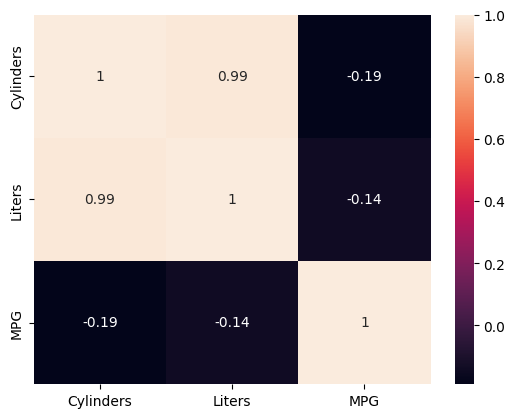

In [21]:
# correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

auto_corr = df_auto[['Cylinders', 'Liters', 'MPG']].corr()
sns.heatmap(auto_corr, annot=True)

print(auto_corr)
plt.show()

In [22]:
df_auto.shape

(6, 7)

# Feature Enriching

In [23]:
df_appLeft = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/appending+data.left.csv')
df_appLeft.head(5)

,Country,Continent,GDP,EducationYears
0,Bangladesh,Asia,"350,000,000,000",4.7
1,China,Asia,"13,180,000,000,000",8.5
2,India,Asia,"2,720,000,000,000",5.7
3,Norway,Europe,"362,000,000,000",14.2
4,United States,North America,"20,650,000,000,000",13.5


In [24]:
df_appRight = pd.read_csv('/content/drive/MyDrive/UMKC_Fa24/datasets/appending+data.right.csv')
df_appRight.head(5)

,Country,Continent,Population
0,Bangladesh,Asia,"129,155,000"
1,Brazil,South America,"170,115,000"
2,China,Asia,"1,277,558,000"
3,India,Asia,"1,013,662,000"
4,United States,North America,"278,357,000"


In [28]:
# inner merge

inner_merge = pd.merge(df_appLeft, df_appRight, how='inner')
inner_merge

,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
2,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
3,United States,North America,"20,650,000,000,000",13.5,"278,357,000"


In [27]:
# outer merge

outer_merge = pd.merge(df_appLeft, df_appRight, how='outer')
outer_merge

,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
2,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
3,Norway,Europe,"362,000,000,000",14.2,NaN
4,United States,North America,"20,650,000,000,000",13.5,"278,357,000"
5,Brazil,South America,NaN,NaN,"170,115,000"


In [29]:
# left merge

left_merge = pd.merge(df_appLeft, df_appRight, how='left')
left_merge

,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
2,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
3,Norway,Europe,"362,000,000,000",14.2,NaN
4,United States,North America,"20,650,000,000,000",13.5,"278,357,000"


In [30]:
# right merge

right_merge = pd.merge(df_appLeft, df_appRight, how='right')
right_merge

,Country,Continent,GDP,EducationYears,Population
0,Bangladesh,Asia,"350,000,000,000",4.7,"129,155,000"
1,Brazil,South America,NaN,NaN,"170,115,000"
2,China,Asia,"13,180,000,000,000",8.5,"1,277,558,000"
3,India,Asia,"2,720,000,000,000",5.7,"1,013,662,000"
4,United States,North America,"20,650,000,000,000",13.5,"278,357,000"
